In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Выгрузим наши данные

In [41]:
payments1 = 'payments_CG1.csv'
payments2 = 'payments_CG2.csv'
payments_test = 'payments_TG.csv'
portaint1 = 'portrait_CG1.csv'
portaint2 = 'portrait_CG2.csv'
portaint_test = 'portrait_TG.csv'

In [42]:
payments1_df = pd.read_csv(payments1, sep=';')
payments_test_df = pd.read_csv(payments_test, sep=';')
payments2_df = pd.read_csv(payments2, sep=';')

In [43]:
payments1_df.describe()

,user_id,revenue,payment_service_id
count,3.770000e+02,377.000000,377.000000
mean,8.923612e+08,6929.206897,91.145889
std,6.162900e+06,8027.889630,58.599773
min,8.910923e+08,26.000000,0.000000
25%,8.913833e+08,2730.000000,19.000000
50%,8.918225e+08,6266.000000,127.000000
75%,8.921850e+08,6448.000000,147.000000
max,9.609370e+08,63037.000000,147.000000


In [44]:
payments2_df = pd.read_csv(payments2, sep=';')
payments2_df.head()

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
0,891266616,06.11.2017 15:25,10.11.2017 17:35,6305,19,autorefill,AR,coins
1,892186737,19.10.2017 6:03,04.11.2017 8:53,4732,147,promo.key31,CL,prem
2,891959004,24.10.2017 0:12,31.10.2017 2:12,10153,147,TrialVipPopup,US,trial
3,892115478,20.10.2017 20:39,26.10.2017 6:26,2366,67,EmptyLikes,ES,other
4,891592941,31.10.2017 12:40,03.11.2017 16:25,6292,147,promo.key31,CH,prem


Посмотрим на наши датафреймы payments

In [45]:
payments1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             377 non-null    float64
 1   registration_date   377 non-null    object 
 2   payment_date        377 non-null    object 
 3   revenue             377 non-null    float64
 4   payment_service_id  377 non-null    float64
 5   place               377 non-null    object 
 6   country             377 non-null    object 
 7   product_type        377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 63.1+ KB


In [46]:
payments2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             328 non-null    int64 
 1   registration_date   328 non-null    object
 2   payment_date        328 non-null    object
 3   revenue             328 non-null    int64 
 4   payment_service_id  328 non-null    int64 
 5   place               328 non-null    object
 6   country             328 non-null    object
 7   product_type        328 non-null    object
dtypes: int64(3), object(5)
memory usage: 20.6+ KB


In [47]:
payments_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             273 non-null    int64 
 1   registration_date   273 non-null    object
 2   payment_date        273 non-null    object
 3   revenue             273 non-null    int64 
 4   payment_service_id  273 non-null    int64 
 5   place               273 non-null    object
 6   country             273 non-null    object
 7   product_type        273 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


Видим, что в тестовых данных сильно меньше записей чем в остальных. Поэтому мы можем или удалить записи в контрольных группах или взять случайную выборку из 273 значений как и в наших тестовых данных

In [48]:
plt.style.use('fivethirtyeight')

In [49]:
payments1_df_g = payments1_df.sample(n=690,random_state=42)

In [50]:
payments1_df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 927 to 36
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             273 non-null    float64
 1   registration_date   273 non-null    object 
 2   payment_date        273 non-null    object 
 3   revenue             273 non-null    float64
 4   payment_service_id  273 non-null    float64
 5   place               273 non-null    object 
 6   country             273 non-null    object 
 7   product_type        273 non-null    object 
dtypes: float64(3), object(5)
memory usage: 48.5+ KB


In [51]:
payments2_df_g = payments2_df.sample(n=273,random_state=42)


In [52]:
payments2_df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 231 to 43
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             273 non-null    int64 
 1   registration_date   273 non-null    object
 2   payment_date        273 non-null    object
 3   revenue             273 non-null    int64 
 4   payment_service_id  273 non-null    int64 
 5   place               273 non-null    object
 6   country             273 non-null    object
 7   product_type        273 non-null    object
dtypes: int64(3), object(5)
memory usage: 19.2+ KB


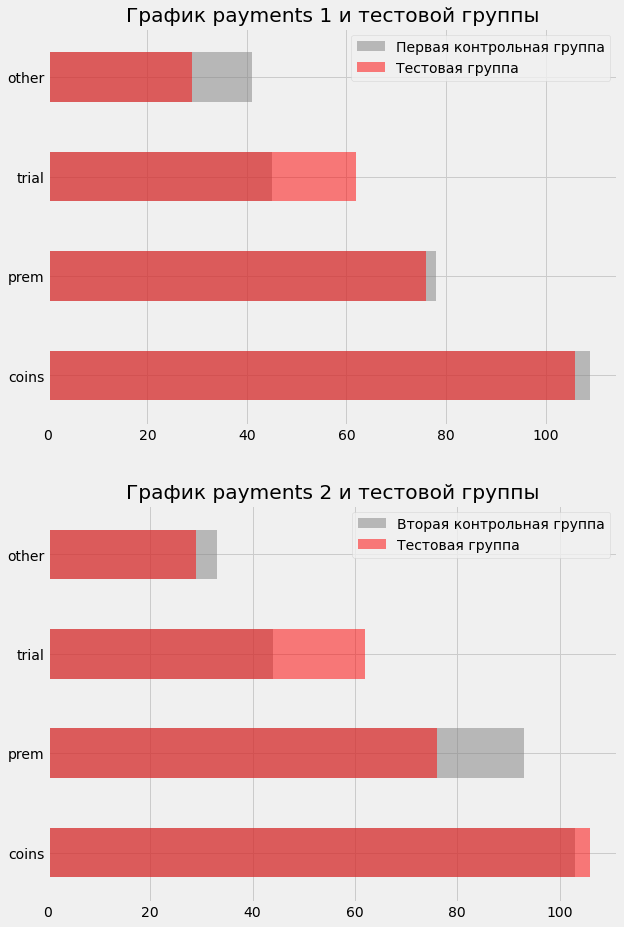

In [53]:
first_group = payments1_df_g['product_type'].value_counts()
test_group = payments_test_df['product_type'].value_counts()
plt.figure(figsize=(20,15))
plt.subplot (2, 2, 1)
first_group.plot(kind='barh', alpha=0.5, label='Первая контрольная группа', color='grey')
test_group.plot(kind='barh',alpha=0.5, label='Тестовая группа', color='red')
plt.legend()
plt.title("График payments 1 и тестовой группы")

second_group = payments2_df_g['product_type'].value_counts()
test_group = payments_test_df['product_type'].value_counts()
plt.subplot (2, 2, 3)
second_group.plot(kind='barh', alpha=0.5, label='Вторая контрольная группа', color='grey')
test_group.plot(kind='barh',alpha=0.5, label='Тестовая группа', color='red')
plt.legend()
plt.title("График payments 2 и тестовой группы")

plt.show()

На графиках видно, что пробную премиум подписку купили больше в тестовой группе и при сравнении тестовой группы со второй видно что премиум подписку купили меньше

О чем это может свидетельствовать?
1. Люди заинтересованы попробовать премиум подписку
2. Люди не готовы платить полноценно за премиум подписку, о чем свидетельствует большая разница Prem в графике сравнения со второй группой

Учитывая что стоимось пробной подписки не изменилась можно сделать вывод что интерес пользователей к обладанию премиум аккаунтом вырос и следует продолжить тестировать.

# Проанализируем срез пользователей

In [54]:
portaint1_df = pd.read_csv(portaint1, sep=';')
portaint_test_df = pd.read_csv(portaint_test, sep=';')
portaint2_df = pd.read_csv(portaint2, sep=';')

In [55]:
portaint1_df.describe()

,user_id,age,attraction_distribution,coins,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
count,4.340000e+03,4340.000000,4340.000000,60.0000,4340.000000,4340.000000,4340.000000,4340.000000,436.0,192.0,4340.000000
mean,8.917578e+08,32.095392,312.048848,1745.9000,0.958065,26.793779,38.553226,44.467512,1.0,1.0,594.761982
std,1.125683e+06,10.257466,320.972130,12902.3577,0.200465,9.405103,15.226951,204.800272,0.0,0.0,7987.922925
min,8.910510e+08,16.000000,0.000000,1.0000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913626e+08,24.000000,0.000000,8.0000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917272e+08,30.000000,238.500000,11.5000,1.000000,25.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920898e+08,38.000000,518.000000,28.0000,1.000000,32.000000,45.000000,21.000000,1.0,1.0,0.000000
max,9.609370e+08,99.000000,1000.000000,99958.0000,1.000000,96.000000,102.000000,4953.000000,1.0,1.0,486330.000000


In [56]:
portaint1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  4340 non-null   int64  
 1   age                      4340 non-null   int64  
 2   attraction_distribution  4340 non-null   int64  
 3   coins                    60 non-null     float64
 4   country                  4340 non-null   object 
 5   retention_days           3016 non-null   object 
 6   sex                      4340 non-null   int64  
 7   user_dating.age_start    4340 non-null   int64  
 8   user_dating.age_end      4340 non-null   int64  
 9   view_count               4340 non-null   int64  
 10  was_special              436 non-null    float64
 11  is_special               192 non-null    float64
 12  total_revenue            4340 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 440.9+ KB


In [57]:
portaint2_df.describe()

,user_id,age,attraction_distribution,coins,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
count,4.264000e+03,4264.000000,4264.000000,61.000000,4264.000000,4264.000000,4264.000000,4264.000000,411.0,191.0,4264.000000
mean,8.917694e+08,32.046201,317.957317,18.147541,0.954268,26.954268,38.906895,45.064493,1.0,1.0,450.384146
std,2.520759e+06,10.170721,326.191737,35.439543,0.208927,9.546657,15.955574,318.188992,0.0,0.0,2859.242228
min,8.910509e+08,16.000000,0.000000,1.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913453e+08,25.000000,0.000000,4.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917205e+08,30.000000,250.000000,10.000000,1.000000,25.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920735e+08,38.000000,548.500000,20.000000,1.000000,32.000000,45.000000,20.000000,1.0,1.0,0.000000
max,1.053059e+09,99.000000,1000.000000,271.000000,1.000000,94.000000,99.000000,16157.000000,1.0,1.0,81796.000000


In [58]:
portaint2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  4264 non-null   int64  
 1   age                      4264 non-null   int64  
 2   attraction_distribution  4264 non-null   int64  
 3   coins                    61 non-null     float64
 4   country                  4264 non-null   object 
 5   retention_days           2900 non-null   object 
 6   sex                      4264 non-null   int64  
 7   user_dating.age_start    4264 non-null   int64  
 8   user_dating.age_end      4264 non-null   int64  
 9   view_count               4264 non-null   int64  
 10  was_special              411 non-null    float64
 11  is_special               191 non-null    float64
 12  total_revenue            4264 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 433.2+ KB


In [59]:
portaint_test_df.describe()

,user_id,age,attraction_distribution,coins,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
count,4.308000e+03,4308.000000,4308.000000,49.000000,4308.000000,4308.000000,4308.000000,4308.000000,408.0,157.0,4308.000000
mean,8.917437e+08,31.889276,316.411328,229.836735,0.953110,26.701486,38.248839,50.391133,1.0,1.0,534.080316
std,4.547670e+05,10.245287,323.373725,1205.819471,0.211427,9.390851,15.344562,318.676437,0.0,0.0,4371.682632
min,8.910511e+08,16.000000,0.000000,1.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913621e+08,25.000000,0.000000,4.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917290e+08,30.000000,250.000000,9.000000,1.000000,24.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920952e+08,38.000000,520.250000,72.000000,1.000000,32.000000,44.000000,22.000000,1.0,1.0,0.000000
max,9.051586e+08,99.000000,1000.000000,8466.000000,1.000000,96.000000,102.000000,12831.000000,1.0,1.0,129870.000000


In [60]:
portaint_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  4308 non-null   int64  
 1   age                      4308 non-null   int64  
 2   attraction_distribution  4308 non-null   int64  
 3   coins                    49 non-null     float64
 4   country                  4308 non-null   object 
 5   retention_days           2978 non-null   object 
 6   sex                      4308 non-null   int64  
 7   user_dating.age_start    4308 non-null   int64  
 8   user_dating.age_end      4308 non-null   int64  
 9   view_count               4308 non-null   int64  
 10  was_special              408 non-null    float64
 11  is_special               157 non-null    float64
 12  total_revenue            4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


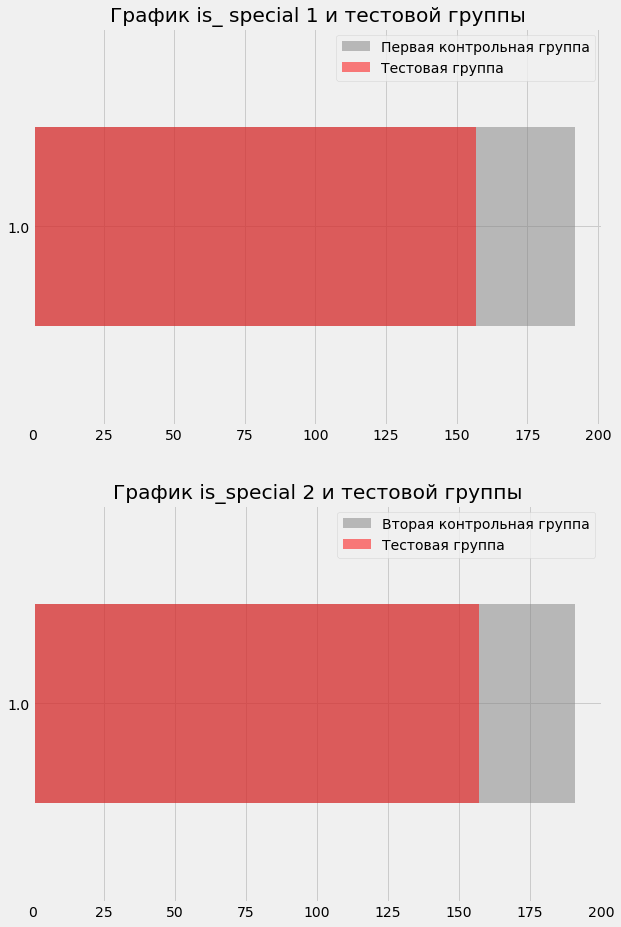

In [61]:
plt.figure(figsize=(20,15))
first_group_port = portaint1_df['is_special'].value_counts()
test_group_port = portaint_test_df['is_special'].value_counts()
plt.subplot (2, 2, 1)
first_group_port.plot(kind='barh', alpha=0.5, label='Первая контрольная группа', color='grey')
test_group_port.plot(kind='barh',alpha=0.5, label='Тестовая группа', color='red')
plt.legend()
plt.title("График is_ special 1 и тестовой группы")

second_group_port = portaint2_df['is_special'].value_counts()
test_group_port = portaint_test_df['is_special'].value_counts()
plt.subplot (2, 2, 3)
second_group_port.plot(kind='barh', alpha=0.5, label='Вторая контрольная группа', color='grey')
test_group_port.plot(kind='barh',alpha=0.5, label='Тестовая группа', color='red')
plt.legend()
plt.title("График is_special 2 и тестовой группы")
plt.show()


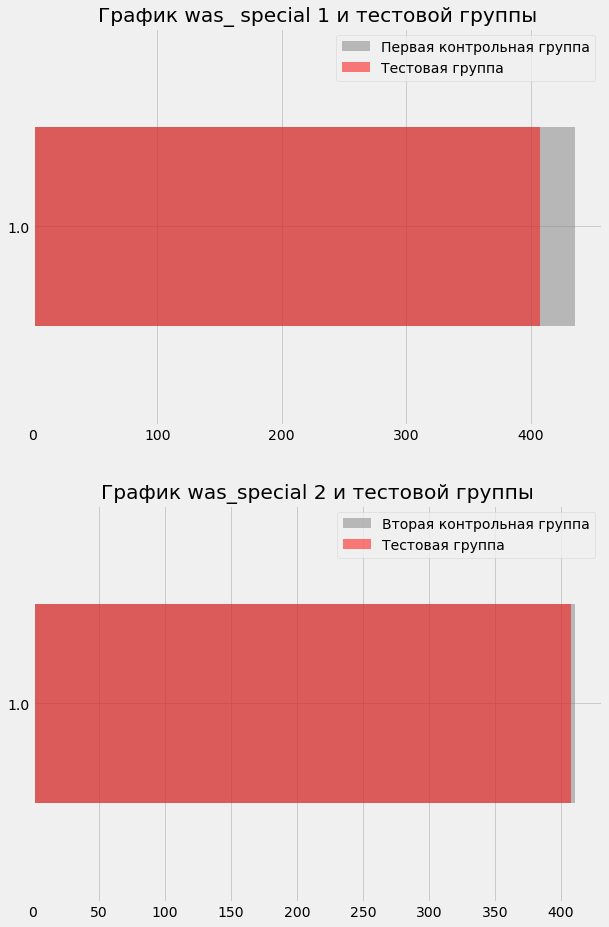

In [62]:
plt.figure(figsize=(20,15))
first_group_port = portaint1_df['was_special'].value_counts()
test_group_port = portaint_test_df['was_special'].value_counts()
plt.subplot (2, 2, 1)
first_group_port.plot(kind='barh', alpha=0.5, label='Первая контрольная группа', color='grey')
test_group_port.plot(kind='barh',alpha=0.5, label='Тестовая группа', color='red')
plt.legend()
plt.title("График was_ special 1 и тестовой группы")

second_group_port = portaint2_df['was_special'].value_counts()
test_group_port = portaint_test_df['was_special'].value_counts()
plt.subplot (2, 2, 3)
second_group_port.plot(kind='barh', alpha=0.5, label='Вторая контрольная группа', color='grey')
test_group_port.plot(kind='barh',alpha=0.5, label='Тестовая группа', color='red')
plt.legend()
plt.title("График was_special 2 и тестовой группы")
plt.show()

Исходя из графиков мы понимаем, что премиум статус был примерно у одинакового количества пользователей, однако после удвоения цены на премиум подписку некоторые люди не стали ее продлевать

# Влияет ли страна пользователя на наличие премиум аккаунта?

In [63]:
portaint1_df.dropna(subset=['is_special'], inplace=True)

In [64]:
portaint1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 65 to 4332
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  192 non-null    int64  
 1   age                      192 non-null    int64  
 2   attraction_distribution  192 non-null    int64  
 3   coins                    39 non-null     float64
 4   country                  192 non-null    object 
 5   retention_days           172 non-null    object 
 6   sex                      192 non-null    int64  
 7   user_dating.age_start    192 non-null    int64  
 8   user_dating.age_end      192 non-null    int64  
 9   view_count               192 non-null    int64  
 10  was_special              192 non-null    float64
 11  is_special               192 non-null    float64
 12  total_revenue            192 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 21.0+ KB


In [65]:
first1_group_port = portaint1_df.dropna(subset=['is_special'], inplace=True)
first1_group_port = portaint1_df['country'].value_counts()
first2_group_port = portaint2_df.dropna(subset=['is_special'], inplace=True)
first2_group_port = portaint2_df['country'].value_counts()
first3_group_port = portaint_test_df.dropna(subset=['is_special'], inplace=True)
first3_group_port = portaint_test_df['country'].value_counts()

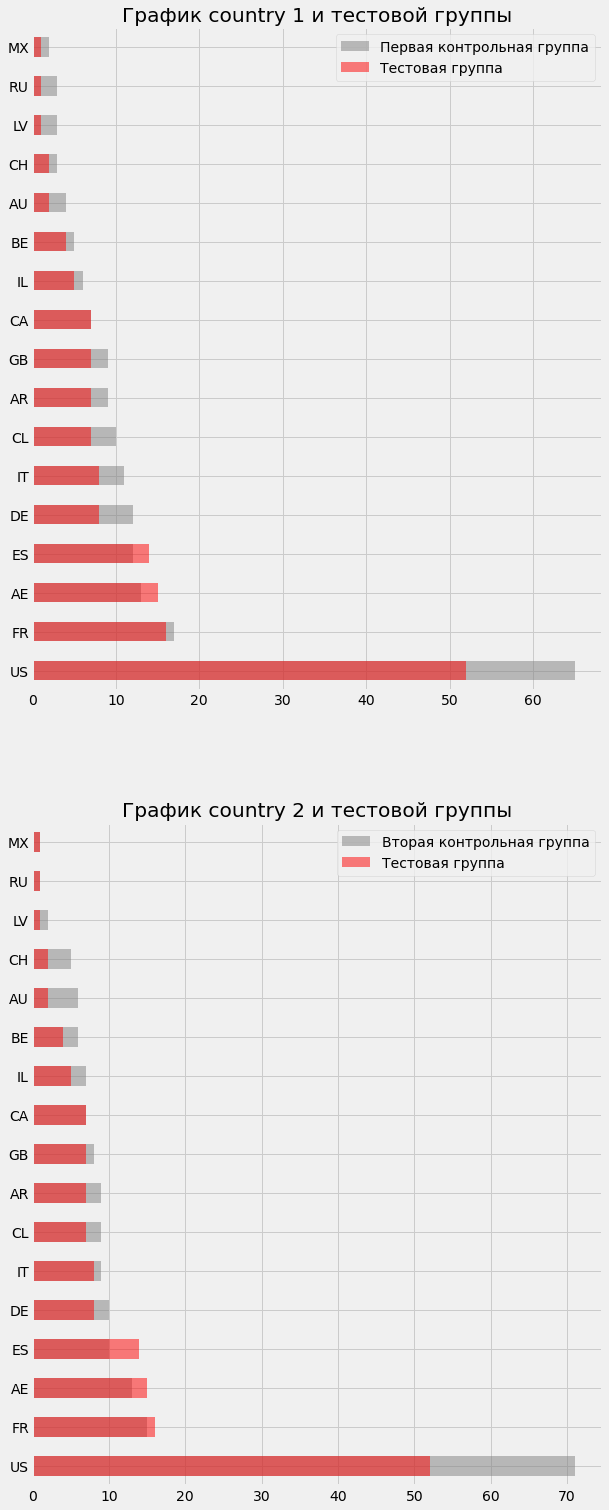

In [66]:
plt.figure(figsize=(20,25))
plt.subplot (2, 2, 1)
first1_group_port.plot(kind='barh', alpha=0.5, label='Первая контрольная группа', color='grey')
first3_group_port.plot(kind='barh',alpha=0.5, label='Тестовая группа', color='red')
plt.title("График country 1 и тестовой группы")
plt.legend()

plt.subplot (2, 2, 3)
first2_group_port.plot(kind='barh', alpha=0.5, label='Вторая контрольная группа', color='grey')
first3_group_port.plot(kind='barh',alpha=0.5, label='Тестовая группа', color='red')
plt.title("График country 2 и тестовой группы")
plt.legend()
plt.show()

Сравнивая графики мы можем заметить что ES AE позитивно отреагировали на удвоение цены, из этого следует что в следующих тестах можно взять больше людей из этих стран
В странах таких как MX AU CH мы видим серьезную просадку по владению премиум аккаунтами. Соответственно из этих стран лучше соктратить количество людей для которых премиум подписка будет по увеличенной стоимости


In [67]:
portaint1_df = pd.read_csv(portaint1, sep=';')
portaint_test_df = pd.read_csv(portaint_test, sep=';')
portaint2_df = pd.read_csv(portaint2, sep=';')

# Влияет ли attraction_distribution на приобретение премиума?

In [68]:
portaint_test_df.describe()

,user_id,age,attraction_distribution,coins,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
count,4.308000e+03,4308.000000,4308.000000,49.000000,4308.000000,4308.000000,4308.000000,4308.000000,408.0,157.0,4308.000000
mean,8.917437e+08,31.889276,316.411328,229.836735,0.953110,26.701486,38.248839,50.391133,1.0,1.0,534.080316
std,4.547670e+05,10.245287,323.373725,1205.819471,0.211427,9.390851,15.344562,318.676437,0.0,0.0,4371.682632
min,8.910511e+08,16.000000,0.000000,1.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913621e+08,25.000000,0.000000,4.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917290e+08,30.000000,250.000000,9.000000,1.000000,24.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920952e+08,38.000000,520.250000,72.000000,1.000000,32.000000,44.000000,22.000000,1.0,1.0,0.000000
max,9.051586e+08,99.000000,1000.000000,8466.000000,1.000000,96.000000,102.000000,12831.000000,1.0,1.0,129870.000000


In [69]:
portaint_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  4308 non-null   int64  
 1   age                      4308 non-null   int64  
 2   attraction_distribution  4308 non-null   int64  
 3   coins                    49 non-null     float64
 4   country                  4308 non-null   object 
 5   retention_days           2978 non-null   object 
 6   sex                      4308 non-null   int64  
 7   user_dating.age_start    4308 non-null   int64  
 8   user_dating.age_end      4308 non-null   int64  
 9   view_count               4308 non-null   int64  
 10  was_special              408 non-null    float64
 11  is_special               157 non-null    float64
 12  total_revenue            4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


Посмотрим на нашу тестовую группу, что бы понять насколько больше людей покупают премиум. Так как среднее значение 320 относительно всех от этой цифры и будеи отталкиваться


In [70]:
attract_1= portaint_test_df.loc[(portaint_test_df['attraction_distribution'] > 320) & (portaint_test_df['is_special'] == 1)]
attract_2= portaint_test_df.loc[(portaint_test_df['attraction_distribution'] > 320) & (portaint_test_df['is_special'] != 1)]
attract_3= portaint_test_df.loc[(portaint_test_df['attraction_distribution'] < 320) & (portaint_test_df['is_special'] == 1)]
attract_4= portaint_test_df.loc[(portaint_test_df['attraction_distribution'] < 320) & (portaint_test_df['is_special'] != 1)]

In [71]:
attract_1 = attract_1['is_special'].value_counts()
attract_2.fillna('1', inplace=True)
attract_4.fillna('1', inplace=True)
attract_2 = attract_2['is_special'].value_counts()
attract_3 = attract_3['is_special'].value_counts()
attract_4 = attract_4['is_special'].value_counts()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Установим симит по x = 200 для наглядности

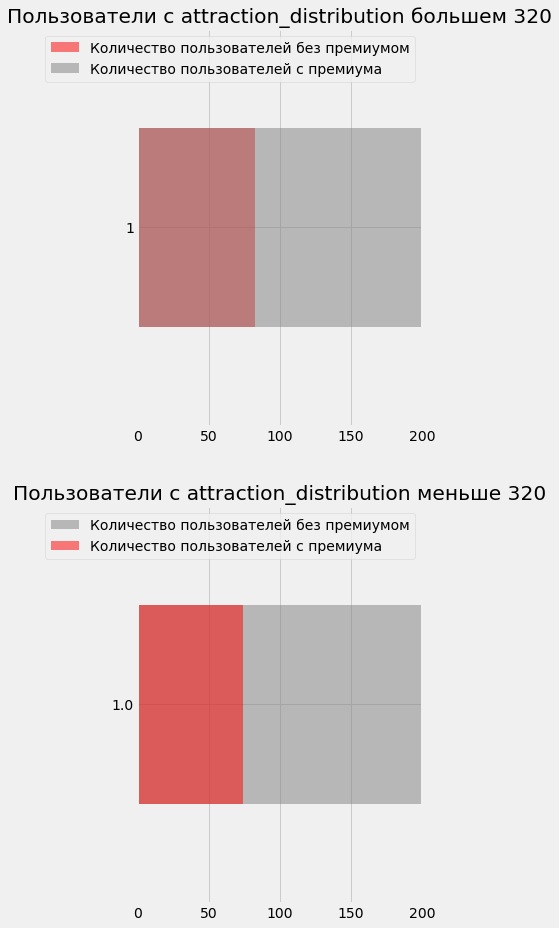

In [73]:
plt.figure(figsize=(10,15))
plt.subplot (2, 2, 1)
attract_1.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='red')
attract_2.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='grey')
plt.title("Пользователи с attraction_distribution большем 320")
plt.legend()
plt.xlim([0, 200])

plt.subplot (2, 2, 3)
attract_4.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
attract_3.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с attraction_distribution меньше 320")
plt.xlim([0, 200])
plt.legend()
plt.show()



Во графикам видно, разница небольшая и attraction_distribution практически не влияет на покупку премиума


# Влияет ли возраст пользователя на покупку премиума?

Медиана возраста у нас 31

In [74]:
age_1= portaint_test_df.loc[(portaint_test_df['age'] > 31) & (portaint_test_df['is_special'] == 1)]
age_2= portaint_test_df.loc[(portaint_test_df['age'] > 31) & (portaint_test_df['is_special'] != 1)]
age_3= portaint_test_df.loc[(portaint_test_df['age'] < 31) & (portaint_test_df['is_special'] == 1)]
age_4= portaint_test_df.loc[(portaint_test_df['age'] < 31) & (portaint_test_df['is_special'] != 1)]

In [75]:
age_1 = age_1['is_special'].value_counts()
age_2.fillna('1', inplace=True)
age_4.fillna('1', inplace=True)
age_2 = age_2['is_special'].value_counts()
age_3 = age_3['is_special'].value_counts()
age_4 = age_4['is_special'].value_counts()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


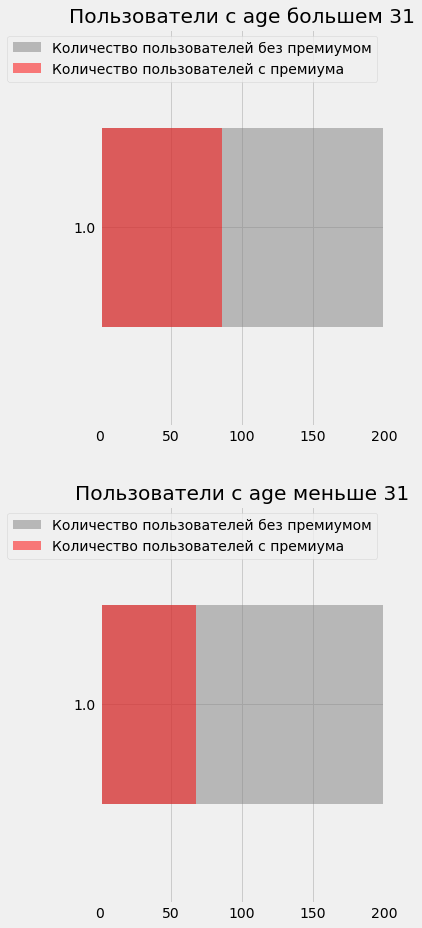

In [76]:
plt.figure(figsize=(10,15))
plt.subplot (2, 2, 1)
age_2.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
age_1.plot(kind='barh',alpha=0.5, label='Количество пользователей c премиума', color='red')
plt.title("Пользователи с age большем 31")
plt.legend()
plt.xlim([0, 200])

plt.subplot (2, 2, 3)
age_4.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
age_3.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с age меньше 31")
plt.legend()
plt.xlim([0, 200])
plt.show()


На данных графиках ситуация немного заметнее, чем attraction_distribution, но выводов пока мы никаких сделать не можем


# Влияет ли количество coins на покупку премиума?

В coins очень много пропусков, которые нужно заполнить, поэтому мы их заполняем цифрой 0. Среднее по coins = 2.16 

In [77]:
portaint_test_df.fillna({'coins':0}, inplace=True)

In [78]:
coins_1= portaint_test_df.loc[(portaint_test_df['coins'] > 2) & (portaint_test_df['is_special'] == 1)]
coins_2= portaint_test_df.loc[(portaint_test_df['coins'] > 2) & (portaint_test_df['is_special'] != 1)]
coins_3= portaint_test_df.loc[(portaint_test_df['coins'] < 2) & (portaint_test_df['is_special'] == 1)]
coins_4= portaint_test_df.loc[(portaint_test_df['coins'] < 2) & (portaint_test_df['is_special'] != 1)]

In [79]:
portaint_test_df.describe()

,user_id,age,attraction_distribution,coins,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
count,4.308000e+03,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,408.0,157.0,4308.000000
mean,8.917437e+08,31.889276,316.411328,2.614206,0.953110,26.701486,38.248839,50.391133,1.0,1.0,534.080316
std,4.547670e+05,10.245287,323.373725,129.608910,0.211427,9.390851,15.344562,318.676437,0.0,0.0,4371.682632
min,8.910511e+08,16.000000,0.000000,0.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913621e+08,25.000000,0.000000,0.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917290e+08,30.000000,250.000000,0.000000,1.000000,24.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920952e+08,38.000000,520.250000,0.000000,1.000000,32.000000,44.000000,22.000000,1.0,1.0,0.000000
max,9.051586e+08,99.000000,1000.000000,8466.000000,1.000000,96.000000,102.000000,12831.000000,1.0,1.0,129870.000000


In [80]:
coins_1 = coins_1['is_special'].value_counts()
coins_2.fillna('1', inplace=True)
coins_4.fillna('1', inplace=True)
coins_2 = coins_2['is_special'].value_counts()
coins_3 = coins_3['is_special'].value_counts()
coins_4 = coins_4['is_special'].value_counts()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


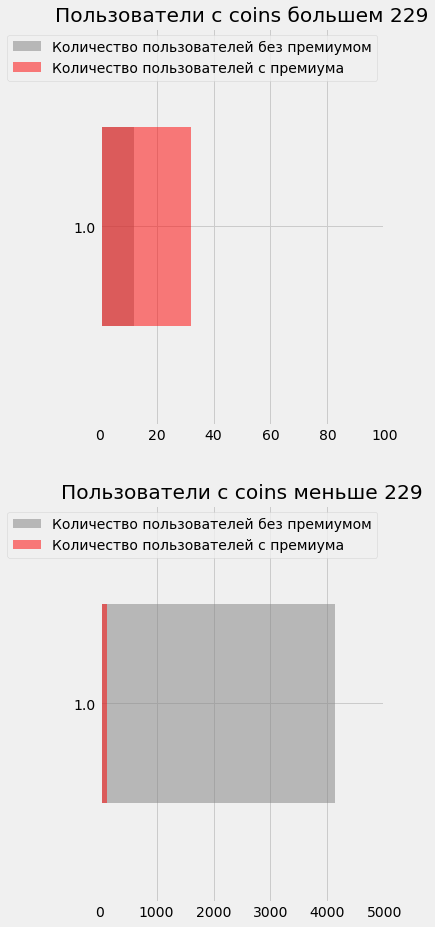

In [81]:
plt.figure(figsize=(10,15))
plt.subplot (2, 2, 1)
coins_2.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
coins_1.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с coins большем 229")
plt.legend()
plt.xlim([0, 100])

plt.subplot (2, 2, 3)
coins_4.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
coins_3.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с coins меньше 229")
plt.legend()
plt.xlim([0, 5000])
plt.show()

Очень у малого количества пользователей есть coins, но процент покупки ими премиум аккаунта намного выше чем у людей у которых их почти нет.
Тут действительно видна разница и поэтому мы можем сказать что те, у кого есть coins с больше вероятностью купит премиум подписку

In [82]:
portaint_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  4308 non-null   int64  
 1   age                      4308 non-null   int64  
 2   attraction_distribution  4308 non-null   int64  
 3   coins                    4308 non-null   float64
 4   country                  4308 non-null   object 
 5   retention_days           2978 non-null   object 
 6   sex                      4308 non-null   int64  
 7   user_dating.age_start    4308 non-null   int64  
 8   user_dating.age_end      4308 non-null   int64  
 9   view_count               4308 non-null   int64  
 10  was_special              408 non-null    float64
 11  is_special               157 non-null    float64
 12  total_revenue            4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


# Влияет ли пол пользователя на наличие премиума?

In [83]:
sex_1= portaint_test_df.loc[(portaint_test_df['sex'] == 1) & (portaint_test_df['is_special'] == 1)]
sex_2= portaint_test_df.loc[(portaint_test_df['sex'] == 1) & (portaint_test_df['is_special'] != 1)]
sex_3= portaint_test_df.loc[(portaint_test_df['sex'] == 0) & (portaint_test_df['is_special'] == 1)]
sex_4= portaint_test_df.loc[(portaint_test_df['sex'] == 0) & (portaint_test_df['is_special'] != 1)]

In [84]:
sex_1 = sex_1['is_special'].value_counts()
sex_2.fillna('1', inplace=True)
sex_4.fillna('1', inplace=True)
sex_2 = sex_2['is_special'].value_counts()
sex_3 = sex_3['is_special'].value_counts()
sex_4 = sex_4['is_special'].value_counts()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


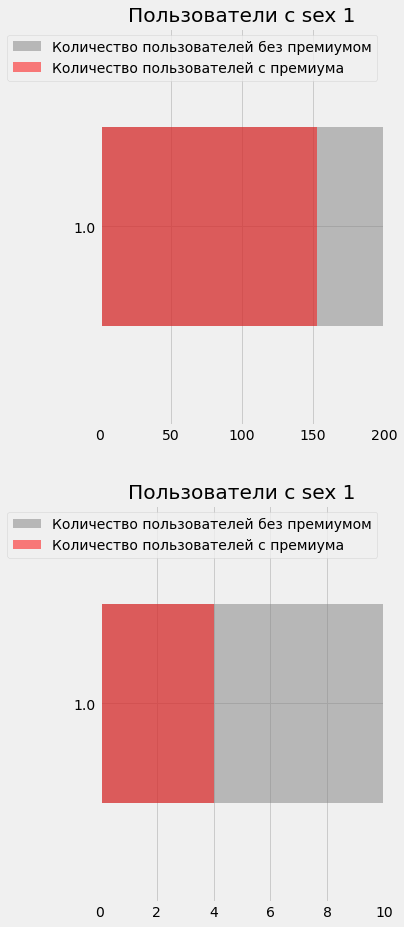

In [85]:
plt.figure(figsize=(10,15))
plt.subplot (2, 2, 1)
sex_2.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
sex_1.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с sex 1")
plt.legend()
plt.xlim([0, 200])

plt.subplot (2, 2, 3)
sex_4.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
sex_3.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с sex 1")
plt.legend()
plt.xlim([0, 10])
plt.show()

Примерно в 20 раз sex 1 больше чем sex 0, но все таки sex 1 примерно в 2 раза больше купили премиум аккаунт

In [86]:
portaint1_df = pd.read_csv(portaint1, sep=';')
portaint_test_df = pd.read_csv(portaint_test, sep=';')
portaint2_df = pd.read_csv(portaint2, sep=';')

# Влияет ли view_count на наличие премиума?

Среднее по view_count = 50

In [87]:

view_count_1= portaint_test_df.loc[(portaint_test_df['view_count'] > 50) & (portaint_test_df['is_special'] == 1)]
view_count_2= portaint_test_df.loc[(portaint_test_df['view_count'] > 50) & (portaint_test_df['is_special'] != 1)]
view_count_3= portaint_test_df.loc[(portaint_test_df['view_count'] < 50) & (portaint_test_df['is_special'] == 1)]
view_count_4= portaint_test_df.loc[(portaint_test_df['view_count'] < 50) & (portaint_test_df['is_special'] != 1)]

In [88]:
view_count_1 = view_count_1['is_special'].value_counts()
view_count_2.fillna('1', inplace=True)
view_count_4.fillna('1', inplace=True)
view_count_2 = view_count_2['is_special'].value_counts()
view_count_3 = view_count_3['is_special'].value_counts()
view_count_4 = view_count_4['is_special'].value_counts()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


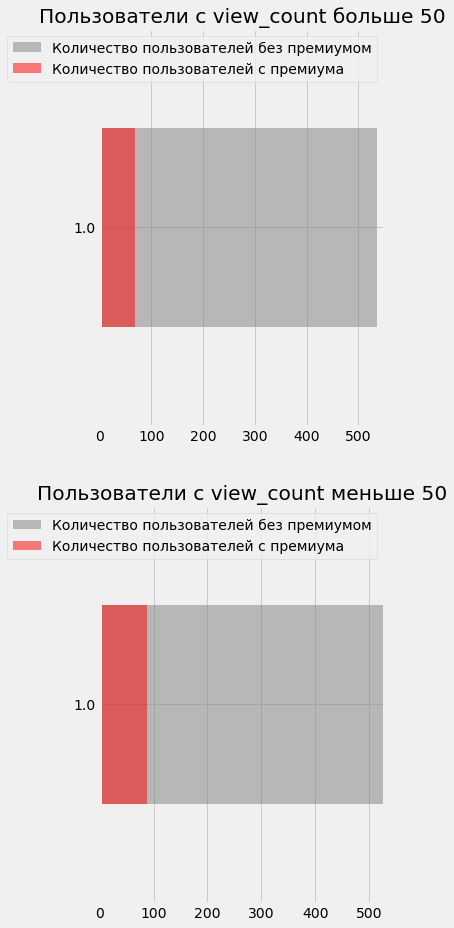

In [90]:
plt.figure(figsize=(10,15))
plt.subplot (2, 2, 1)
view_count_2.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
view_count_1.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с view_count больше 50")
plt.legend()
plt.xlim([0, 550])

plt.subplot (2, 2, 3)
view_count_4.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
view_count_3.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с view_count меньше 50")
plt.legend()
plt.xlim([0, 528])
plt.show()

Разница небольша и вдобавок пользователей с view_count меньше 50 значительно больше, поэтому можем сделать вывод что данный признак практически не влияет на преобретение премиума

# Влияет ли total_revenue на приобретение премиума?

Среднее total_revenue = 534

In [110]:
total_revenue_1= portaint_test_df.loc[(portaint_test_df['total_revenue'] > 534) & (portaint_test_df['is_special'] == 1)]
total_revenue_2= portaint_test_df.loc[(portaint_test_df['total_revenue'] > 534) & (portaint_test_df['is_special'] != 1)]
total_revenue_3= portaint_test_df.loc[(portaint_test_df['total_revenue'] < 534) & (portaint_test_df['is_special'] == 1)]
total_revenue_4= portaint_test_df.loc[(portaint_test_df['total_revenue'] < 534) & (portaint_test_df['is_special'] != 1)]

In [111]:
total_revenue_1 = total_revenue_1['is_special'].value_counts()
total_revenue_2.fillna('1', inplace=True)
total_revenue_4.fillna('1', inplace=True)
total_revenue_2 = total_revenue_2['is_special'].value_counts()
total_revenue_3 = total_revenue_3['is_special'].value_counts()
total_revenue_4 = total_revenue_4['is_special'].value_counts()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


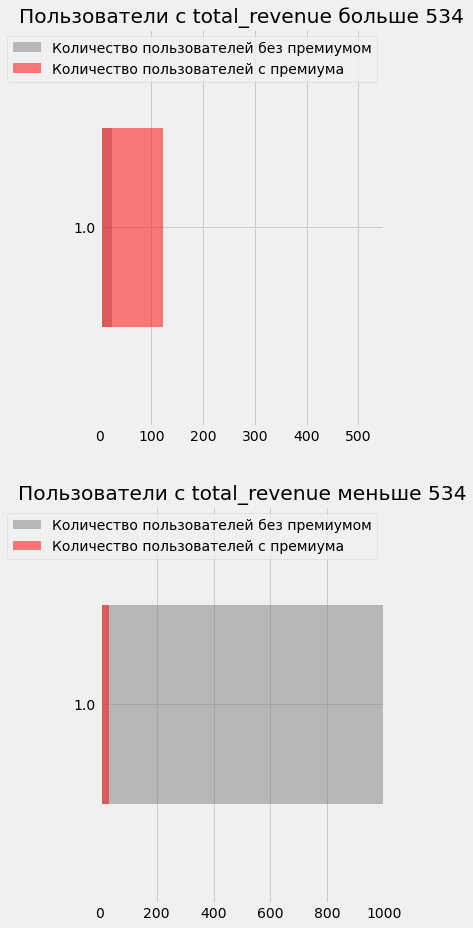

In [113]:
plt.figure(figsize=(10,15))
plt.subplot (2, 2, 1)
total_revenue_2.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
total_revenue_1.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с total_revenue больше 534")
plt.legend()
plt.xlim([0, 550])

plt.subplot (2, 2, 3)
total_revenue_4.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
total_revenue_3.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с total_revenue меньше 534")
plt.legend()
plt.xlim([0, 1000])
plt.show()

total_revenue оказывае очень большое значение на наличие премиума. Тут можно однозначно сказать, что пользователь с total_revenue
большей 534 скорее всего купит премиум за удвоенную цены

# Влияет ли user_dating.age на приобретение премиума?

Среднее 
user_dating.age_start = 26
user_datingage_end = 38

In [130]:
user_datingage_start_1= portaint_test_df.loc[(portaint_test_df['user_dating.age_start'] > 26) & (portaint_test_df['is_special'] == 1)]
user_datingage_start_2= portaint_test_df.loc[(portaint_test_df['user_dating.age_start'] > 26) & (portaint_test_df['is_special'] != 1)]
user_datingage_start_3= portaint_test_df.loc[(portaint_test_df['user_dating.age_start'] < 26) & (portaint_test_df['is_special'] == 1)]
user_datingage_start_4= portaint_test_df.loc[(portaint_test_df['user_dating.age_start'] < 26) & (portaint_test_df['is_special'] != 1)]

In [131]:
user_datingage_start_1 = user_datingage_start_1['is_special'].value_counts()
user_datingage_start_2.fillna('1', inplace=True)
user_datingage_start_4.fillna('1', inplace=True)
user_datingage_start_2 = user_datingage_start_2['is_special'].value_counts()
user_datingage_start_3 = user_datingage_start_3['is_special'].value_counts()
user_datingage_start_4 = user_datingage_start_4['is_special'].value_counts()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


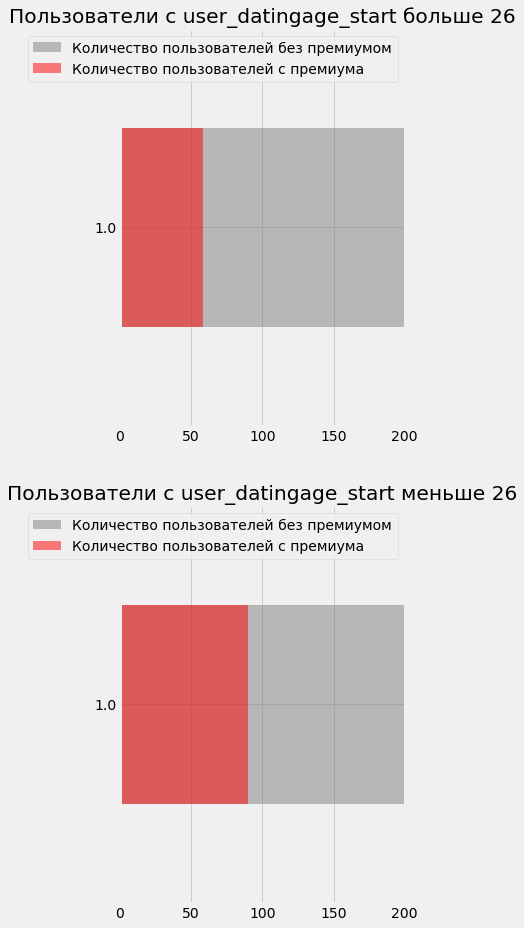

In [133]:
plt.figure(figsize=(10,15))
plt.subplot (2, 2, 1)
user_datingage_start_2.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
user_datingage_start_1.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с user_datingage_start больше 26")
plt.legend()
plt.xlim([0, 200])

plt.subplot (2, 2, 3)
user_datingage_start_4.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
user_datingage_start_3.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с user_datingage_start меньше 26")
plt.legend()
plt.xlim([0, 200])
plt.show()

In [134]:
user_datingage_end_1= portaint_test_df.loc[(portaint_test_df['user_dating.age_end'] > 38) & (portaint_test_df['is_special'] == 1)]
user_datingage_end_2= portaint_test_df.loc[(portaint_test_df['user_dating.age_end'] > 38) & (portaint_test_df['is_special'] != 1)]
user_datingage_end_3= portaint_test_df.loc[(portaint_test_df['user_dating.age_end'] < 38) & (portaint_test_df['is_special'] == 1)]
user_datingage_end_4= portaint_test_df.loc[(portaint_test_df['user_dating.age_end'] < 38) & (portaint_test_df['is_special'] != 1)]

In [135]:
user_datingage_end_1 = user_datingage_end_1['is_special'].value_counts()
user_datingage_end_2.fillna('1', inplace=True)
user_datingage_end_4.fillna('1', inplace=True)
user_datingage_end_2 = user_datingage_end_2['is_special'].value_counts()
user_datingage_end_3 = user_datingage_end_3['is_special'].value_counts()
user_datingage_end_4 = user_datingage_end_4['is_special'].value_counts()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


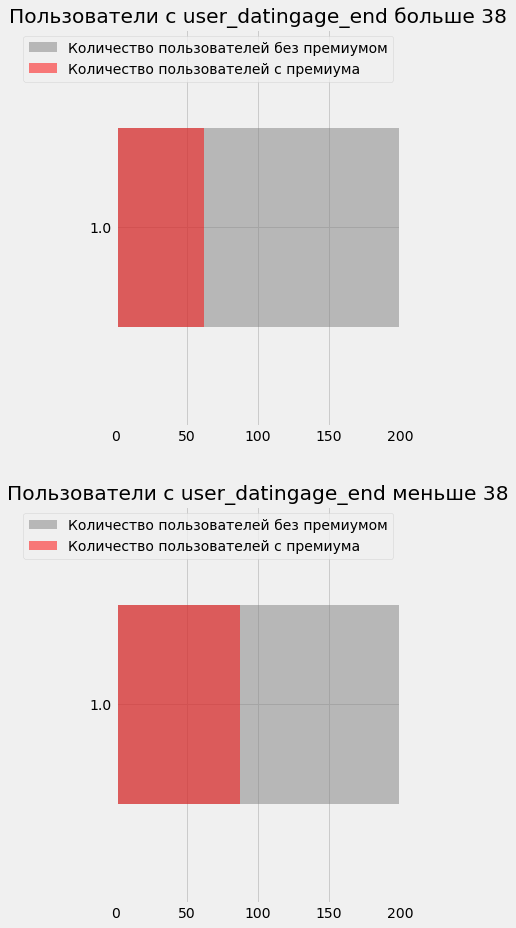

In [137]:
plt.figure(figsize=(10,15))
plt.subplot (2, 2, 1)
user_datingage_end_2.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
user_datingage_end_1.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с user_datingage_end больше 38")
plt.legend()
plt.xlim([0, 200])

plt.subplot (2, 2, 3)
user_datingage_end_4.plot(kind='barh', alpha=0.5, label='Количество пользователей без премиумом', color='grey')
user_datingage_end_3.plot(kind='barh',alpha=0.5, label='Количество пользователей с премиума', color='red')
plt.title("Пользователи с user_datingage_end меньше 38")
plt.legend()
plt.xlim([0, 200])
plt.show()

На этих графиках мы видим, что незначительно,но премиум больше берут люди с user_datingage_start < 26 и user_dating.age_end < 38

# Итог

Пользователь с наличеством coins > 2, total_revenue > 534, user_datingage_start < 26, user_dating.age_end < 38 с огромной вероятностью купит нашу премиум подписку по удвоенной цене
Так же ES AE и FR (по 1ой контрольной группе) положительно влияют на преобретение премиум аккаунта 